# DW_pandas_Task5

## 20201226

DataWhale_pandas组队学习第五章，变形，周末时间，调整状态，加油！！！

### 长宽表的变形

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'Class':[1,1,2,2],
                   'Name':['San Zhang','San Zhang','Si Li','Si Li'],
                   'Subject':['Chinese','Math','Chinese','Math'],
                   'Grade':[80,75,90,85],
                   'ABC':['B','C','A','B']})
df

,Class,Name,Subject,Grade,ABC
0,1,San Zhang,Chinese,80,B
1,1,San Zhang,Math,75,C
2,2,Si Li,Chinese,90,A
3,2,Si Li,Math,85,B


In [3]:
df.pivot(index='ABC', columns='Subject', values='Grade')

Subject,Chinese,Math
ABC,,
A,90.0,NaN
B,80.0,85.0
C,NaN,75.0


In [4]:
df.pivot(index='Name', columns=['ABC','Subject'], values='Grade')

ABC,B,C,A,B
Subject,Chinese,Math,Chinese,Math
Name,,,,
San Zhang,80.0,75.0,NaN,NaN
Si Li,NaN,NaN,90.0,85.0


In [5]:
df.pivot(index=['Name','ABC'], columns='Subject', values='Grade')

Subject        Chinese  Math
Name      ABC               
San Zhang B       80.0   NaN
          C        NaN  75.0
Si Li     A       90.0   NaN
          B        NaN  85.0

In [6]:
df.pivot(index='Subject', columns='Name', values=['Grade','ABC'])

Grade             ABC      
Name    San Zhang Si Li San Zhang Si Li
Subject                                
Chinese        80    90         B     A
Math           75    85         C     B

In [7]:
df.pivot(index='Name', columns='ABC', values=['Grade','Subject'])

Grade           Subject               
ABC           A   B    C        A        B     C
Name                                            
San Zhang   NaN  80   75      NaN  Chinese  Math
Si Li        90  85  NaN  Chinese     Math   NaN

In [8]:
df.pivot(index='Subject', columns=['Class','Name'], values=['Grade','ABC'])

Grade             ABC      
Class           1     2         1     2
Name    San Zhang Si Li San Zhang Si Li
Subject                                
Chinese        80    90         B     A
Math           75    85         C     B

行索引、列索引和值可以以任意组合，利用pivot进行变形操作需要满足唯一性的要求，即由于在新表中的行列索引对应了唯一的value，因此原表中的index和columns对应两个列的行组合必须唯一。该组合中使用Class和Name行列组合就会出错，因为有重合，而和其它组合则没有问题。

In [9]:
df = pd.DataFrame({'Name':['San Zhang', 'San Zhang', 
                              'San Zhang', 'San Zhang',
                              'Si Li', 'Si Li', 'Si Li', 'Si Li'],
                   'Subject':['Chinese', 'Chinese', 'Math', 'Math',
                                 'Chinese', 'Chinese', 'Math', 'Math'],
                   'Grade':[80, 90, 100, 90, 70, 80, 85, 95]})
df

,Name,Subject,Grade
0,San Zhang,Chinese,80
1,San Zhang,Chinese,90
2,San Zhang,Math,100
3,San Zhang,Math,90
4,Si Li,Chinese,70
5,Si Li,Chinese,80
6,Si Li,Math,85
7,Si Li,Math,95


In [10]:
df.pivot_table(index='Name', columns='Subject', values='Grade', aggfunc=lambda x:x.mean(), margins=True)

Subject,Chinese,Math,All
Name,,,
San Zhang,85,95.0,90.00
Si Li,75,90.0,82.50
All,80,92.5,86.25


#### 【练一练】
在上面的边际汇总例子中，行或列的汇总为新表中行元素或者列元素的平均值，而总体的汇总为新表中四个元素的平均值。这种关系一定成立吗？若不成立，请给出一个例子来说明。

In [11]:
df.pivot_table(index='Name', columns='Subject', values='Grade', aggfunc=lambda x:x.std(), margins=True)

Subject,Chinese,Math,All
Name,,,
San Zhang,7.071068,7.071068,8.164966
Si Li,7.071068,7.071068,10.408330
All,8.164966,6.454972,9.543135


In [12]:
df.pivot_table(index='Name', columns='Subject', values='Grade', aggfunc=lambda x:x.min(), margins=True)

Subject,Chinese,Math,All
Name,,,
San Zhang,80,90,80
Si Li,70,85,70
All,70,85,70


标准差计算的边际汇总在这种关系中并不成立，标准差按各汇总进行计算而得出应有的值，而不是平均值。同理，最大值和最小值等也是一样的。

In [13]:
df = pd.DataFrame({'Class':[1,2],
                   'Name':['San Zhang', 'Si Li'],
                   'Chinese':[80, 90],
                   'Math':[80, 75]})
df

,Class,Name,Chinese,Math
0,1,San Zhang,80,80
1,2,Si Li,90,75


In [14]:
df_melted = df.melt(id_vars=['Name'],value_vars=['Class','Chinese','Math'],var_name='Subject', value_name='Grade')
df_melted

,Name,Subject,Grade
0,San Zhang,Class,1
1,Si Li,Class,2
2,San Zhang,Chinese,80
3,Si Li,Chinese,90
4,San Zhang,Math,80
5,Si Li,Math,75


In [15]:
df_melted = df.melt(id_vars = ['Class', 'Name'],
                    value_vars = ['Chinese', 'Math'],
                    var_name = 'Subject',
                    value_name = 'Grade')
df_melted

,Class,Name,Subject,Grade
0,1,San Zhang,Chinese,80
1,2,Si Li,Chinese,90
2,1,San Zhang,Math,80
3,2,Si Li,Math,75


In [16]:
df_unmelted = df_melted.pivot(index = ['Class', 'Name'],
                              columns='Subject',
                              values='Grade')
df_unmelted

,Subject,Chinese,Math
Class,Name,,
1,San Zhang,80,80
2,Si Li,90,75


In [17]:
df_unmelted = df_unmelted.reset_index().rename_axis(columns={'Subject':''})
df_unmelted.equals(df)

True

melt的转换看起来有些复杂，因为自己空间感不强，查百度了解下melt:

pandas.melt 使用参数：

pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
参数解释：

frame:要处理的数据集。

id_vars:不需要被转换的列名。

value_vars:需要转换的列名，如果剩下的列全部都要转换，就不用写了。

var_name和value_name是自定义设置对应的列名。

col_level :如果列是MultiIndex，则使用此级别。

这个转换是不是只能是一列值？var_name=None, value_name='value'，多列怎么办？用列表传入测试出错，应该不行吧。

In [18]:
df = pd.DataFrame({'Class':[1,2],'Name':['San Zhang', 'Si Li'],
                   'Chinese_Mid':[80, 75], 'Math_Mid':[90, 85],
                   'Chinese_Final':[80, 75], 'Math_Final':[90, 85]})
df

,Class,Name,Chinese_Mid,Math_Mid,Chinese_Final,Math_Final
0,1,San Zhang,80,90,80,90
1,2,Si Li,75,85,75,85


In [19]:
pd.wide_to_long(df,
                stubnames=['Chinese', 'Math'],
                i = ['Class', 'Name'],
                j='Examination',
                sep='_',
                suffix='.+')

Chinese  Math
Class Name      Examination               
1     San Zhang Mid               80    90
                Final             80    90
2     Si Li     Mid               75    85
                Final             75    85

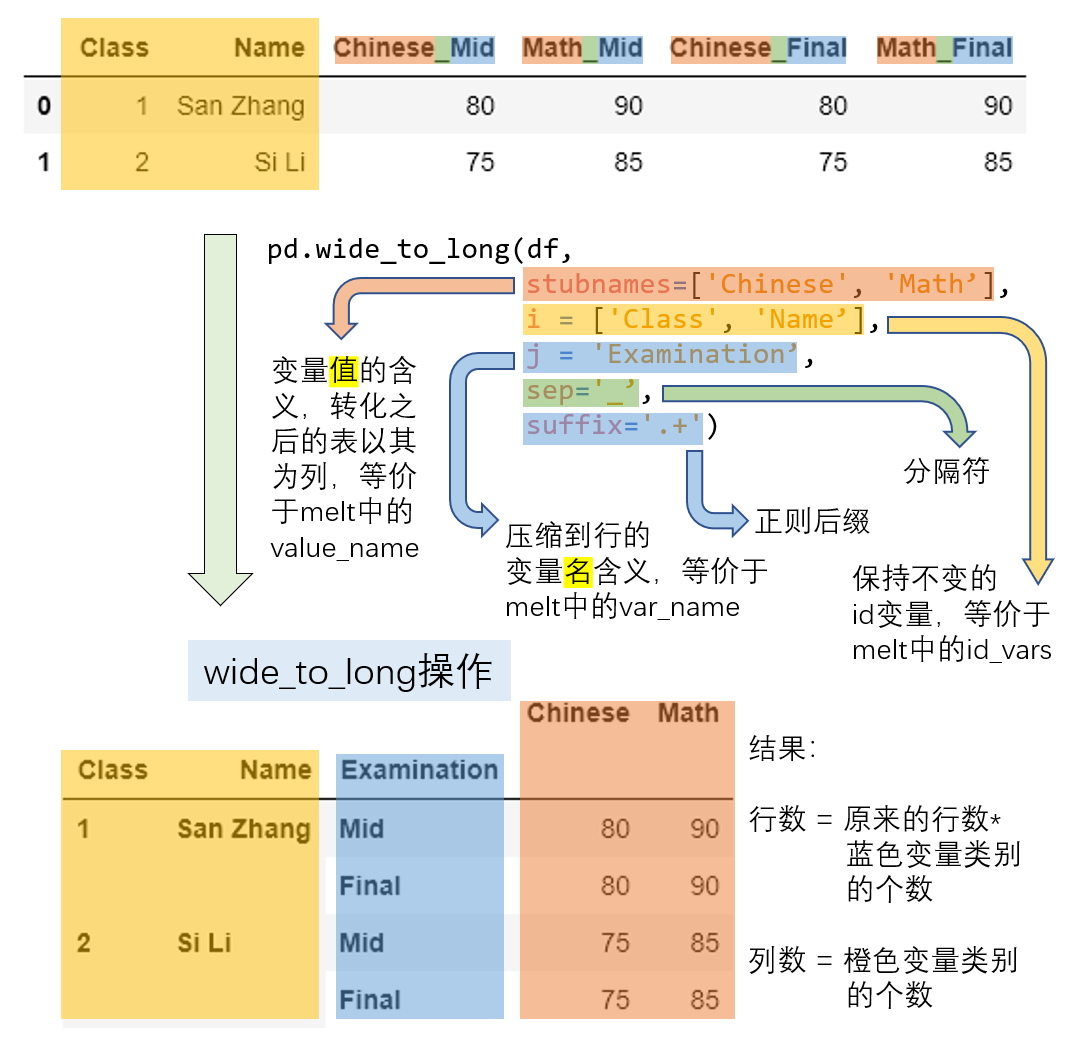

这个看上去更晕😵，意思有些明白，理解对应关系有些混乱，分隔符sep=\'\_\'和suffix=\'\.\+\'是作用于j的吗？

In [20]:
df = pd.DataFrame({'Class':[1, 1, 2, 2, 1, 1, 2, 2],
                   'Name':['San Zhang', 'San Zhang', 'Si Li', 'Si Li',
                              'San Zhang', 'San Zhang', 'Si Li', 'Si Li'],
                   'Examination': ['Mid', 'Final', 'Mid', 'Final',
                                    'Mid', 'Final', 'Mid', 'Final'],
                   'Subject':['Chinese', 'Chinese', 'Chinese', 'Chinese',
                                 'Math', 'Math', 'Math', 'Math'],
                   'Grade':[80, 75, 85, 65, 90, 85, 92, 88],
                   'rank':[10, 15, 21, 15, 20, 7, 6, 2]})
df

,Class,Name,Examination,Subject,Grade,rank
0,1,San Zhang,Mid,Chinese,80,10
1,1,San Zhang,Final,Chinese,75,15
2,2,Si Li,Mid,Chinese,85,21
3,2,Si Li,Final,Chinese,65,15
4,1,San Zhang,Mid,Math,90,20
5,1,San Zhang,Final,Math,85,7
6,2,Si Li,Mid,Math,92,6
7,2,Si Li,Final,Math,88,2


In [21]:
res = df.pivot(index = ['Class', 'Name'],
                       columns = ['Subject','Examination'],
                       values = ['Grade','rank'])
res

Grade                     rank                 
Subject         Chinese       Math       Chinese       Math      
Examination         Mid Final  Mid Final     Mid Final  Mid Final
Class Name                                                       
1     San Zhang      80    75   90    85      10    15   20     7
2     Si Li          85    65   92    88      21    15    6     2

In [22]:
res.columns = res.columns.map(lambda x:'_'.join(x))
res = res.reset_index()
res

,Class,Name,Grade_Chinese_Mid,Grade_Chinese_Final,Grade_Math_Mid,Grade_Math_Final,rank_Chinese_Mid,rank_Chinese_Final,rank_Math_Mid,rank_Math_Final
0,1,San Zhang,80,75,90,85,10,15,20,7
1,2,Si Li,85,65,92,88,21,15,6,2


In [23]:
res = pd.wide_to_long(res, stubnames=['Grade', 'rank'],
                           i = ['Class', 'Name'],
                           j = 'Subject_Examination',
                           sep = '_',
                           suffix = '.+')
res = res.reset_index()
res

,Class,Name,Subject_Examination,Grade,rank
0,1,San Zhang,Chinese_Mid,80,10
1,1,San Zhang,Chinese_Final,75,15
2,1,San Zhang,Math_Mid,90,20
3,1,San Zhang,Math_Final,85,7
4,2,Si Li,Chinese_Mid,85,21
5,2,Si Li,Chinese_Final,65,15
6,2,Si Li,Math_Mid,92,6
7,2,Si Li,Math_Final,88,2


In [24]:
res[['Subject', 'Examination']] = res['Subject_Examination'].str.split('_', expand=True)
res

,Class,Name,Subject_Examination,Grade,rank,Subject,Examination
0,1,San Zhang,Chinese_Mid,80,10,Chinese,Mid
1,1,San Zhang,Chinese_Final,75,15,Chinese,Final
2,1,San Zhang,Math_Mid,90,20,Math,Mid
3,1,San Zhang,Math_Final,85,7,Math,Final
4,2,Si Li,Chinese_Mid,85,21,Chinese,Mid
5,2,Si Li,Chinese_Final,65,15,Chinese,Final
6,2,Si Li,Math_Mid,92,6,Math,Mid
7,2,Si Li,Math_Final,88,2,Math,Final


In [25]:
res = res[['Class', 'Name', 'Examination', 'Subject', 'Grade', 'rank']].sort_values('Subject')
res = res.reset_index(drop=True)
res

,Class,Name,Examination,Subject,Grade,rank
0,1,San Zhang,Mid,Chinese,80,10
1,1,San Zhang,Final,Chinese,75,15
2,2,Si Li,Mid,Chinese,85,21
3,2,Si Li,Final,Chinese,65,15
4,1,San Zhang,Mid,Math,90,20
5,1,San Zhang,Final,Math,85,7
6,2,Si Li,Mid,Math,92,6
7,2,Si Li,Final,Math,88,2


一步步拆分下来，回到原来的结构，半懂半懂，主要还是各种语法函数不熟悉，不慌，慢慢来。

### 索引的变形

In [26]:
df = pd.DataFrame(np.ones((4,2)),
                  index = pd.Index([('A', 'cat', 'big'),
                                    ('A', 'dog', 'small'),
                                    ('B', 'cat', 'big'),
                                    ('B', 'dog', 'small')]),
                  columns=['col_1', 'col_2'])
df

col_1  col_2
A cat big      1.0    1.0
  dog small    1.0    1.0
B cat big      1.0    1.0
  dog small    1.0    1.0

In [27]:
df.unstack()

col_1       col_2      
        big small   big small
A cat   1.0   NaN   1.0   NaN
  dog   NaN   1.0   NaN   1.0
B cat   1.0   NaN   1.0   NaN
  dog   NaN   1.0   NaN   1.0

In [28]:
df.unstack(1)

col_1      col_2     
          cat  dog   cat  dog
A big     1.0  NaN   1.0  NaN
  small   NaN  1.0   NaN  1.0
B big     1.0  NaN   1.0  NaN
  small   NaN  1.0   NaN  1.0

In [29]:
df.unstack([0,2])

col_1                  col_2                 
        A          B           A          B      
      big small  big small   big small  big small
cat   1.0   NaN  1.0   NaN   1.0   NaN  1.0   NaN
dog   NaN   1.0  NaN   1.0   NaN   1.0  NaN   1.0

类似于pivot中的唯一性要求，在unstack中必须保证 被转为列索引的行索引层和被保留的行索引层构成的组合是唯一的，例如把前两个列索引改成相同的破坏唯一性，那么就会报错。

In [30]:
df1 = df.unstack([0,2])
df1.stack()

col_1      col_2     
              A    B     A    B
cat big     1.0  1.0   1.0  1.0
dog small   1.0  1.0   1.0  1.0

In [31]:
df1.stack([1,2])

col_1  col_2
cat A big      1.0    1.0
    B big      1.0    1.0
dog A small    1.0    1.0
    B small    1.0    1.0

这些看起还是比较直观，只是形式上的改变，可能再跟上面一样来个复杂的改变就又傻了😃😃

### 其他变形函数

In [32]:
df = pd.read_csv('../data/learn_pandas.csv')
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [33]:
pd.crosstab(index = df.School, columns = df.Transfer)

Transfer,N,Y
School,,
Fudan University,38,1
Peking University,28,2
Shanghai Jiao Tong University,53,0
Tsinghua University,62,4


In [34]:
pd.crosstab(index = df.School, columns = df.Transfer, values = [0]*df.shape[0], aggfunc = 'count')

Transfer,N,Y
School,,
Fudan University,38.0,1.0
Peking University,28.0,2.0
Shanghai Jiao Tong University,53.0,NaN
Tsinghua University,62.0,4.0


In [35]:
df.pivot_table(index = 'School',
               columns = 'Transfer',
               values = 'Height',
               aggfunc = 'count')

Transfer,N,Y
School,,
Fudan University,32.0,1.0
Peking University,27.0,1.0
Shanghai Jiao Tong University,52.0,NaN
Tsinghua University,56.0,4.0


看了代码对values=\'Name\'有疑问，为什么要用Name？然后看到说明：

“同样，可以利用`pivot_table`进行等价操作，由于这里统计的是组合的频数，因此`values`参数无论传入哪一个列都不会影响最后的结果”

但是把values从Name改为Height，统计数据发生了改变，是否因为有存在缺失值的情况？

In [36]:
df.isna().sum()

School          0
Grade           0
Name            0
Gender          0
Height         17
Weight         11
Transfer       12
Test_Number     0
Test_Date       0
Time_Record     0
dtype: int64

In [37]:
df.pivot_table(index = 'School',
               columns = 'Transfer',
               values = 'Weight',
               aggfunc = 'count')

Transfer,N,Y
School,,
Fudan University,38.0,1.0
Peking University,25.0,2.0
Shanghai Jiao Tong University,49.0,NaN
Tsinghua University,60.0,4.0


In [38]:
df.pivot_table(index = 'School',
               columns = 'Transfer',
               values = 'Grade',
               aggfunc = 'count')

Transfer,N,Y
School,,
Fudan University,38.0,1.0
Peking University,28.0,2.0
Shanghai Jiao Tong University,53.0,NaN
Tsinghua University,62.0,4.0


果然，换成有缺失值的，出来的结果都不一样，换回没有缺失值的就都对了。

#### 【练一练】
前面提到了`crosstab`的性能劣于`pivot_table`，请选用多个聚合方法进行验证。

In [39]:
pd.crosstab(index = df.School, columns = df.Grade, values = [0]*df.shape[0], aggfunc = 'count')

Grade,Freshman,Junior,Senior,Sophomore
School,,,,
Fudan University,9,12,11,8
Peking University,13,8,8,5
Shanghai Jiao Tong University,13,17,22,5
Tsinghua University,17,22,14,16


这个性能怎么验证呢？？？搞不懂。

In [40]:
df_ex = pd.DataFrame({'A': [[1, 2], 'my_str', {1, 2}, pd.Series([3, 4])],
                      'B': 1})
df_ex

,A,B
0,"[1, 2]",1
1,my_str,1
2,"{1, 2}",1
3,0 3 1 4 dtype: int64,1


In [41]:
df_ex.explode('A')

,A,B
0,1,1
0,2,1
1,my_str,1
2,"{1, 2}",1
3,3,1
3,4,1


被展开的单元格必须存储list, tuple, Series, np.ndarray中的一种类型。字典、字符串不能展开，展开后索引不变。

In [42]:
pd.get_dummies(df.Grade).head()

,Freshman,Junior,Senior,Sophomore
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [43]:
pd.get_dummies(df.School).head()

,Fudan University,Peking University,Shanghai Jiao Tong University,Tsinghua University
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


get_dummies是用于特征构建的重要函数之一，其作用是把类别特征转为指示变量。例如，对年级一列转为指示变量，属于某一个年级的对应列标记为1，否则为0

这家伙这么重要，为啥只有短短说明，只有这单一功能吗？

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

data : array-like, Series, or DataFrame 输入的数据

prefix : string, list of strings, or dict of strings, default None  get_dummies转换后，列名的前缀

columns : list-like, default None   指定需要实现类别转换的列名

dummy_na : bool, default False   增加一列表示空缺值，如果False就忽略空缺值

drop_first : bool, default False   获得k中的k-1个类别值，去除第一个

## 练习
### Ex1：美国非法药物数据集

现有一份关于美国非法药物的数据集，其中`SubstanceName, DrugReports`分别指药物名称和报告数量：

In [44]:
df = pd.read_csv('../data/drugs.csv').sort_values(['State','COUNTY','SubstanceName'],ignore_index=True)
df.head(3)

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2011,KY,ADAIR,Buprenorphine,3
1,2012,KY,ADAIR,Buprenorphine,5
2,2013,KY,ADAIR,Buprenorphine,4


1. 将数据转为如下的形式：

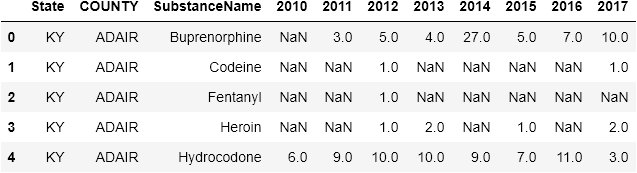

2. 将第1问中的结果恢复为原表。
3. 按`State`分别统计每年的报告数量总和，其中`State, YYYY`分别为列索引和行索引，要求分别使用`pivot_table`函数与`groupby+unstack`两种不同的策略实现，并体会它们之间的联系。

In [45]:
df.shape

(24062, 5)

In [46]:
df_demo = df.pivot(index=['State','COUNTY','SubstanceName'], columns='YYYY', values='DrugReports').head()
df_demo

YYYY                        2010  2011  2012  2013  2014  2015  2016  2017
State COUNTY SubstanceName                                                
KY    ADAIR  Buprenorphine   NaN   3.0   5.0   4.0  27.0   5.0   7.0  10.0
             Codeine         NaN   NaN   1.0   NaN   NaN   NaN   NaN   1.0
             Fentanyl        NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN
             Heroin          NaN   NaN   1.0   2.0   NaN   1.0   NaN   2.0
             Hydrocodone     6.0   9.0  10.0  10.0   9.0   7.0  11.0   3.0

In [47]:
df_demo = df_demo.reset_index()
df_demo

YYYY,State,COUNTY,SubstanceName,2010,2011,2012,2013,2014,2015,2016,2017
0,KY,ADAIR,Buprenorphine,NaN,3.0,5.0,4.0,27.0,5.0,7.0,10.0
1,KY,ADAIR,Codeine,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2,KY,ADAIR,Fentanyl,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,KY,ADAIR,Heroin,NaN,NaN,1.0,2.0,NaN,1.0,NaN,2.0
4,KY,ADAIR,Hydrocodone,6.0,9.0,10.0,10.0,9.0,7.0,11.0,3.0


做一遍就能理解了，一开始就用index=\'SubstanceName\'，不知道加上State和COUNTY，提示shape有错，还去查看了一下shape，原来是index得全加上啊。

In [48]:
df_reset = df_demo.copy()

In [49]:
df_melted = df_reset.melt(id_vars = ['State', 'COUNTY','SubstanceName'],
                          value_vars = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
                          var_name = 'YYYY',
                          value_name = 'DrugReports')
df_melted.head()

,State,COUNTY,SubstanceName,YYYY,DrugReports
0,KY,ADAIR,Buprenorphine,2010,NaN
1,KY,ADAIR,Codeine,2010,NaN
2,KY,ADAIR,Fentanyl,2010,NaN
3,KY,ADAIR,Heroin,2010,NaN
4,KY,ADAIR,Hydrocodone,2010,6.0


In [50]:
df_melted = df_melted[['YYYY', 'State', 'COUNTY', 'SubstanceName', 'DrugReports']]    # 列名顺序重排一下
df_melted.head()

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2010,KY,ADAIR,Buprenorphine,NaN
1,2010,KY,ADAIR,Codeine,NaN
2,2010,KY,ADAIR,Fentanyl,NaN
3,2010,KY,ADAIR,Heroin,NaN
4,2010,KY,ADAIR,Hydrocodone,6.0


In [51]:
df_melted = df_melted.dropna(subset=['DrugReports'])      # 去缺失值
df_melted.head()

,YYYY,State,COUNTY,SubstanceName,DrugReports
4,2010,KY,ADAIR,Hydrocodone,6.0
5,2011,KY,ADAIR,Buprenorphine,3.0
9,2011,KY,ADAIR,Hydrocodone,9.0
10,2012,KY,ADAIR,Buprenorphine,5.0
11,2012,KY,ADAIR,Codeine,1.0


In [52]:
df_melted = df_melted.sort_values(['State','COUNTY','SubstanceName'],ignore_index=True)  # 这个按照原题的排序
df_melted.head()

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2011,KY,ADAIR,Buprenorphine,3.0
1,2012,KY,ADAIR,Buprenorphine,5.0
2,2013,KY,ADAIR,Buprenorphine,4.0
3,2014,KY,ADAIR,Buprenorphine,27.0
4,2015,KY,ADAIR,Buprenorphine,5.0


In [53]:
df_melted = df_melted.astype({'YYYY':'int64','DrugReports':'int64'})    # 改一下数据类型
df_melted.head()

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2011,KY,ADAIR,Buprenorphine,3
1,2012,KY,ADAIR,Buprenorphine,5
2,2013,KY,ADAIR,Buprenorphine,4
3,2014,KY,ADAIR,Buprenorphine,27
4,2015,KY,ADAIR,Buprenorphine,5


In [54]:
df_melted.equals(df)   # 跟原数据对比

False

为什么还是不对，找不到原因了，看参考答案YYYY要转换为int64,转了还是不行，查了很久，还是没找到😅😅

In [55]:
df1 = df.pivot_table(index = 'YYYY',
               columns = 'State',
               values = 'DrugReports',
               aggfunc = 'sum')
df1

State,KY,OH,PA,VA,WV
YYYY,,,,,
2010,10453,19707,19814,8685,2890
2011,10289,20330,19987,6749,3271
2012,10722,23145,19959,7831,3376
2013,11148,26846,20409,11675,4046
2014,11081,30860,24904,9037,3280
2015,9865,37127,25651,8810,2571
2016,9093,42470,26164,10195,2548
2017,9394,46104,27894,10448,1614


In [56]:
df2 = df.groupby(['YYYY', 'State'])['DrugReports'].sum()
df2.head()

YYYY  State
2010  KY       10453
      OH       19707
      PA       19814
      VA        8685
      WV        2890
Name: DrugReports, dtype: int64

In [57]:
df2.unstack()

State,KY,OH,PA,VA,WV
YYYY,,,,,
2010,10453,19707,19814,8685,2890
2011,10289,20330,19987,6749,3271
2012,10722,23145,19959,7831,3376
2013,11148,26846,20409,11675,4046
2014,11081,30860,24904,9037,3280
2015,9865,37127,25651,8810,2571
2016,9093,42470,26164,10195,2548
2017,9394,46104,27894,10448,1614


两种方法用起来差不多，按步骤来还是第二种方法更直观一些，可能是我对第一种方法理解的还不够。

### Ex2：特殊的wide_to_long方法

从功能上看，`melt`方法应当属于`wide_to_long`的一种特殊情况，即`stubnames`只有一类。请使用`wide_to_long`生成`melt`一节中的`df_melted`。（提示：对列名增加适当的前缀）

In [58]:
df = pd.DataFrame({'Class':[1,2],
                   'Name':['San Zhang', 'Si Li'],
                   'Chinese':[80, 90],
                   'Math':[80, 75]})
df

,Class,Name,Chinese,Math
0,1,San Zhang,80,80
1,2,Si Li,90,75


In [59]:
df_melted = df.melt(id_vars = ['Class', 'Name'],
                    value_vars = ['Chinese', 'Math'],
                    var_name = 'Subject',
                    value_name = 'Grade')
df_melted

,Class,Name,Subject,Grade
0,1,San Zhang,Chinese,80
1,2,Si Li,Chinese,90
2,1,San Zhang,Math,80
3,2,Si Li,Math,75


In [60]:
df_demo = df.rename(columns={'Chinese': 'A_Chinese', 'Math': 'A_Math'})
df_demo

,Class,Name,A_Chinese,A_Math
0,1,San Zhang,80,80
1,2,Si Li,90,75


In [61]:
df_demo = pd.wide_to_long(df_demo,
                          stubnames = ['A'],
                          i = ['Class', 'Name'],
                          j = 'Subject',
                          sep = '_',
                          suffix = '.+')
df_demo

A
Class Name      Subject    
1     San Zhang Chinese  80
                Math     80
2     Si Li     Chinese  90
                Math     75

In [62]:
df_demo.reset_index().rename(columns={'A': 'Grade'})

,Class,Name,Subject,Grade
0,1,San Zhang,Chinese,80
1,1,San Zhang,Math,80
2,2,Si Li,Chinese,90
3,2,Si Li,Math,75


wide_to_long的应用还不是很理解，参考了答案，对分解的步骤基本和想的差不多，就是不知道怎么下手。

#### 交笔记了
算是比较完整的学了一章，虽然刚好两天在周末，但也是挺赶的，那个练一练搞不清什么意思，也不知道怎么做性能测试，本想看看视频说明，结果没有🙄，性能测试是不是很高深的事情啊？两道练习题多多少少能懂一些，但完成还是蛮困难的，就一点点拼凑，一边查一边做，也参考了答案，练习一还是没成功，实在是找不到原因了🤪🤪